<a href="https://colab.research.google.com/github/shashwat1998/YOLOv5/blob/master/YOLOv5_SoccerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Isabek/XmlToTxt
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/shashwat1998/YOLOv5

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 50 (delta 1), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (50/50), done.
Cloning into 'yolov5'...
remote: Enumerating objects: 909, done.
remote: Total 909 (delta 0), reused 0 (delta 0), pack-reused 909
Receiving objects: 100% (909/909), 3.39 MiB | 1.76 MiB/s, done.
Resolving deltas: 100% (602/602), done.
Cloning into 'YOLOv5'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 403 (delta 1), reused 0 (delta 0), pack-reused 397
Receiving objects: 100% (403/403), 420.09 MiB | 15.61 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
%cd yolov5
!pip install -U -r requirements.txt
%cd ..

In [14]:
%cd XmlToTxt
!pip install -U -r requirements.txt
%cd ..

/content/XmlToTxt
Requirement already up-to-date: declxml==0.9.1 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 1)) (0.9.1)
/content


In [20]:
!cp -rf XmlToTxt/* ./

In [19]:
!cp -rf YOLOv5/* ./

In [21]:
!python xmltotxt.py -xml labels/val -out labels/val1

In [22]:
!python xmltotxt.py -xml labels/train -out labels/train1

In [23]:
!rm -rf labels/train
!rm -rf labels/val

In [24]:
!mv labels/val1 labels/val
!mv labels/train1 labels/train

In [25]:
!mkdir -p soccer

In [26]:
!cp -rf images ./soccer/images/

In [27]:
!cp -rf labels ./soccer/labels/

In [28]:
%cd yolov5/

/content/yolov5


In [30]:
!python train.py --batch 16 --epochs 50 --data ./data/soccer.yaml --cfg ./models/yolov5s.yaml --weights ''

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/soccer.yaml', device='', epochs=50, evolve=False, img_size=[640, 640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-07-02 11:41:18.076418: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

          

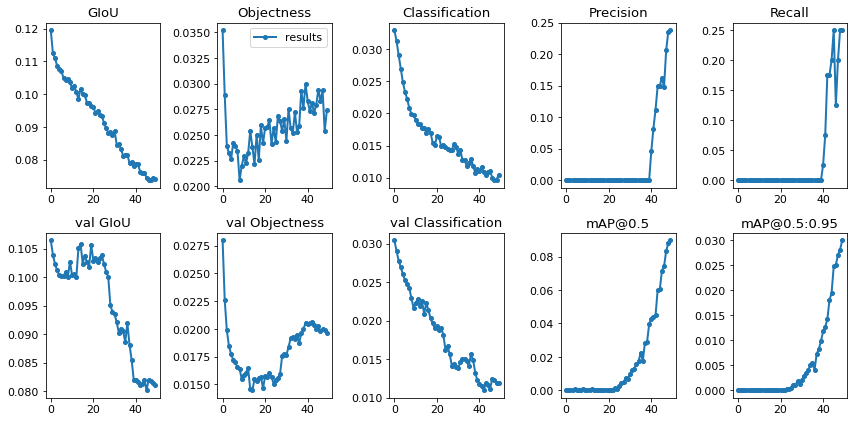

In [31]:
from utils.utils import plot_results
plot_results()

In [32]:
!python test.py --weights weights/last.pt --data ./data/soccer.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/soccer.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 191 layers, 7.25779e+06 parameters, 0 gradients
Fusing layers...
Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
Caching labels /content/soccer/labels/val (40 found, 0 missing, 0 empty, 0 duplicate, for 40 images): 100% 40/40 [00:00<00:00, 11594.48it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:05<00:00,  2.77s/it]
                 all          40          40       0.185       0.225       0.083      0.0242
                ball          40          40       0.185       0.225       0.083      0.0242
Speed: 4.5/1.7/6.2 ms inference/NMS/total per 640x640 image at batch-size 32


In [33]:
!python test.py --weights weights/best.pt --data ./data/soccer.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/soccer.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 191 layers, 7.25779e+06 parameters, 0 gradients
Fusing layers...
Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
Caching labels /content/soccer/labels/val (40 found, 0 missing, 0 empty, 0 duplicate, for 40 images): 100% 40/40 [00:00<00:00, 12018.92it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:05<00:00,  2.75s/it]
                 all          40          40       0.171       0.225      0.0742      0.0201
                ball          40          40       0.171       0.225      0.0742      0.0201
Speed: 4.5/1.7/6.2 ms inference/NMS/total per 640x640 image at batch-size 32


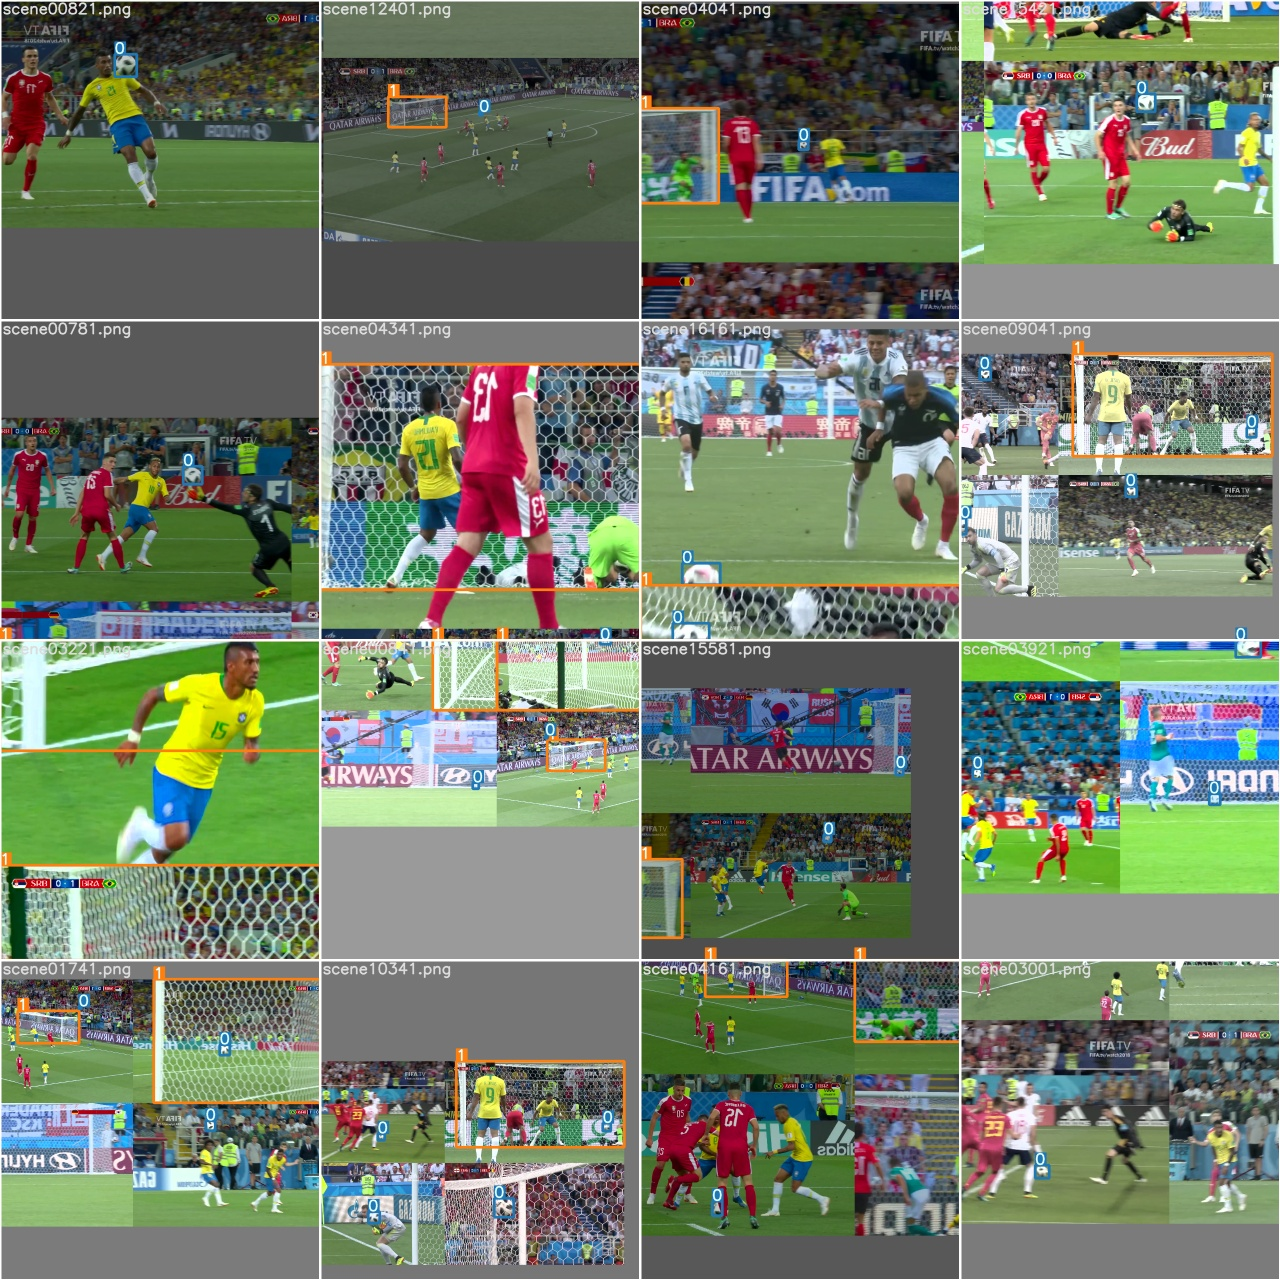

In [34]:
from IPython.display import Image, clear_output  # to display images
Image(filename='./train_batch0.jpg', width=900)

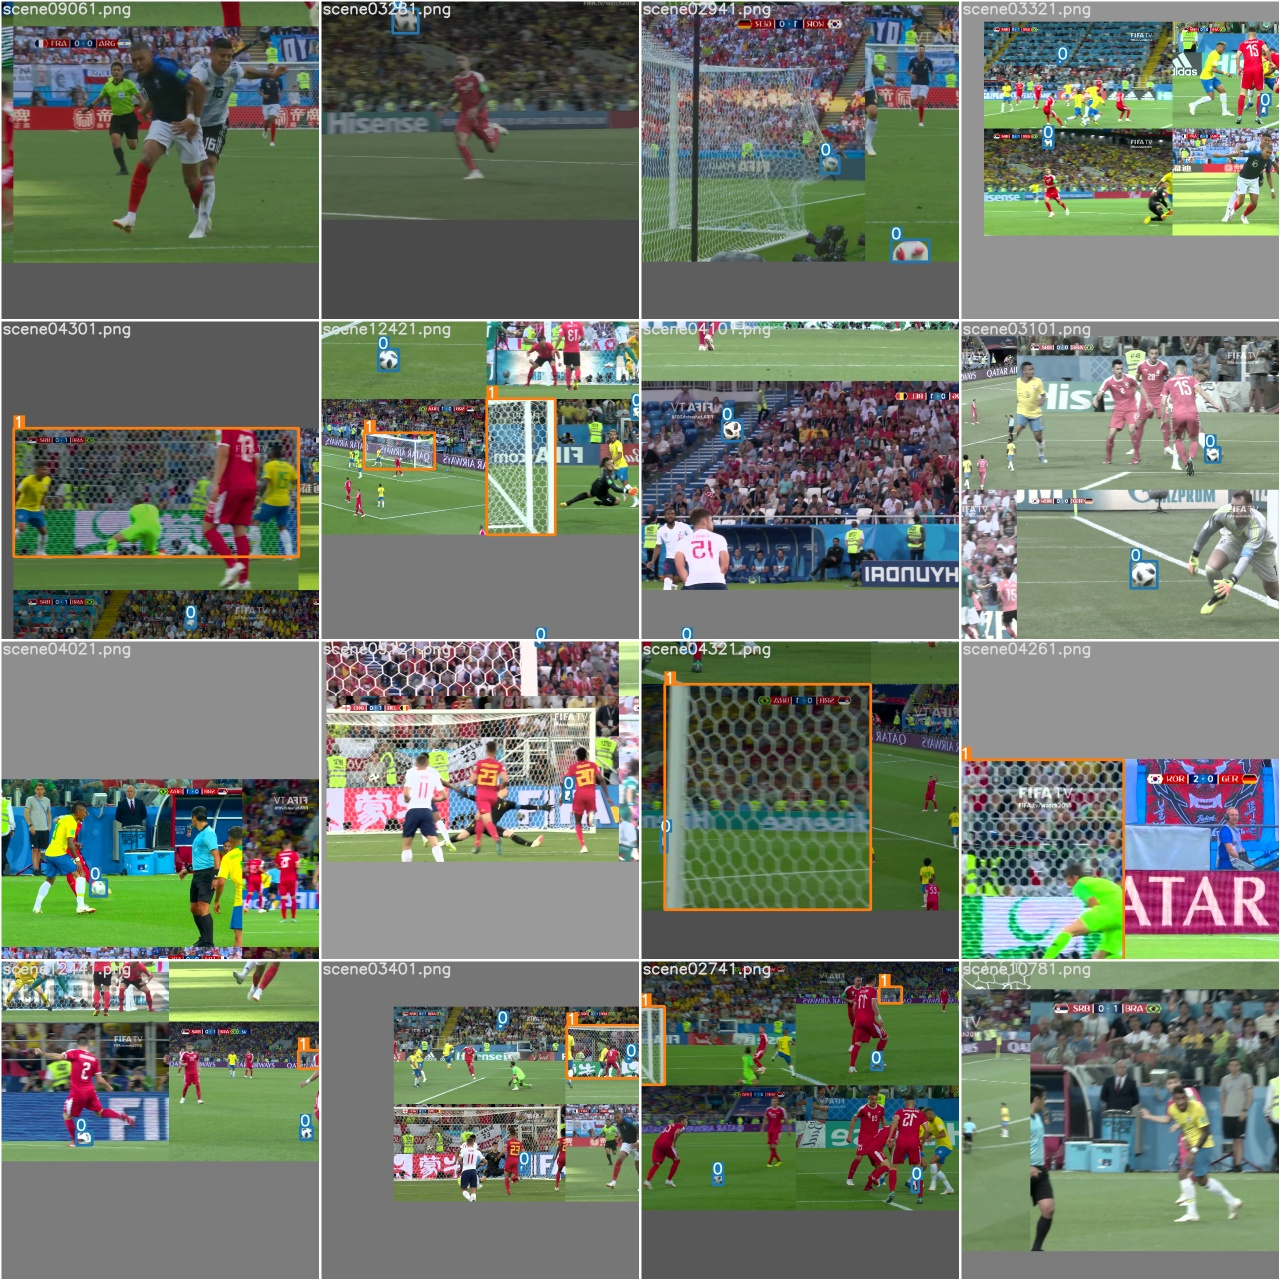

In [35]:
Image(filename='./train_batch1.jpg', width=900)

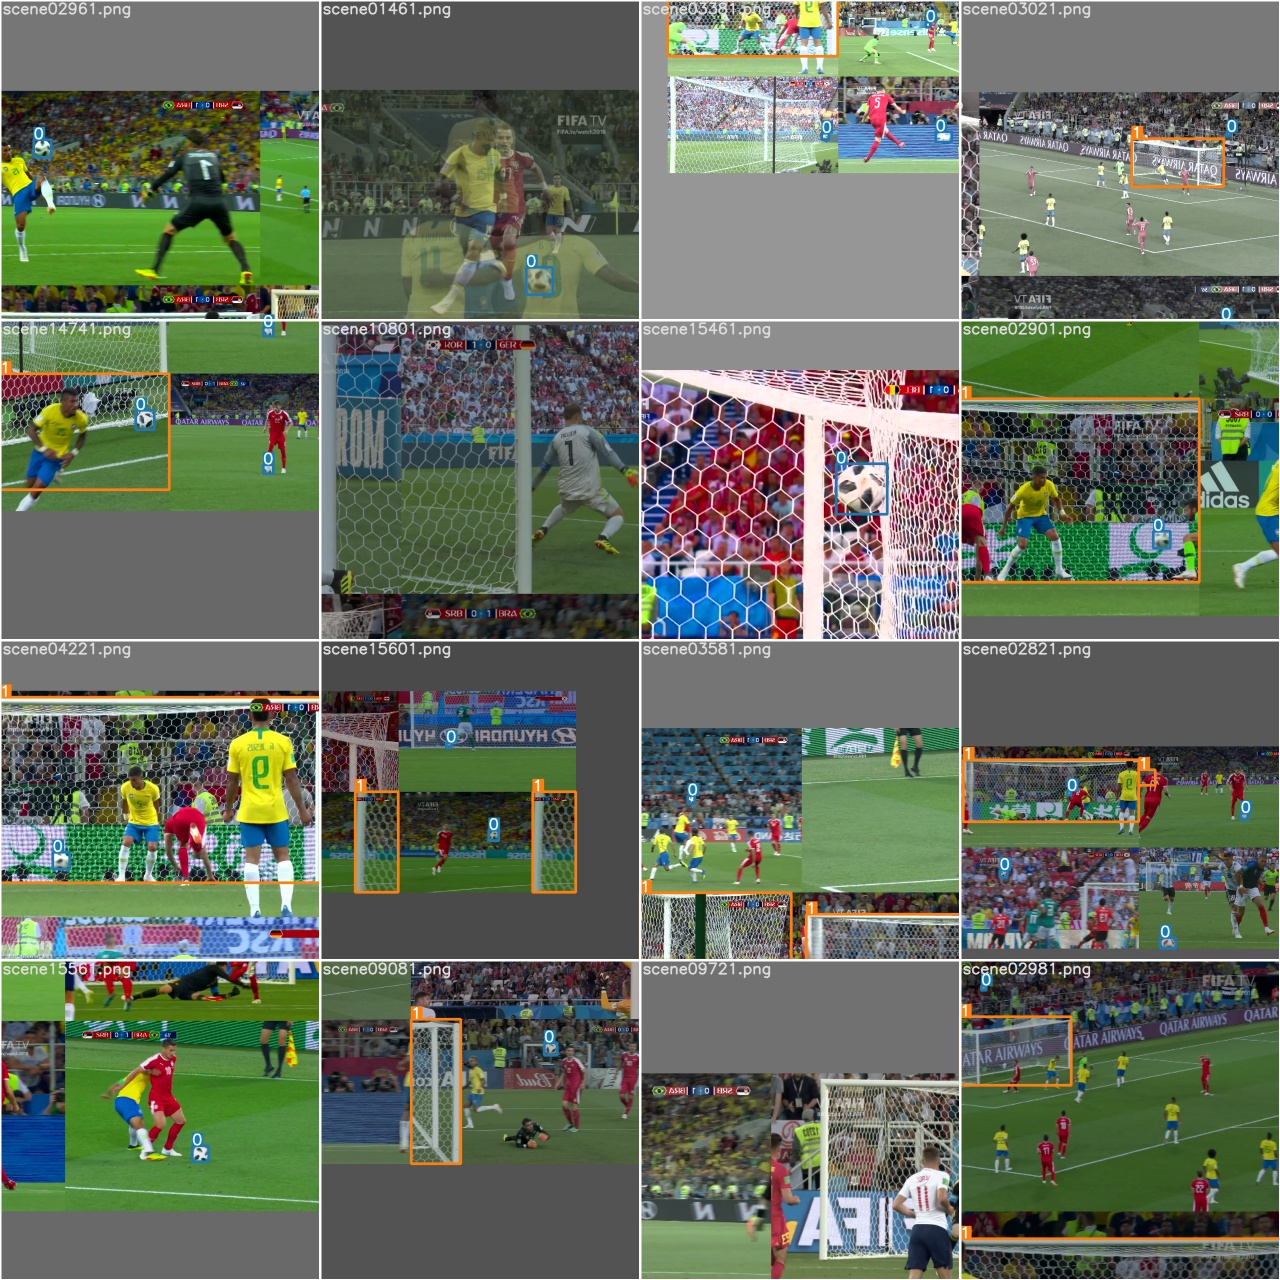

In [36]:

Image(filename='./train_batch2.jpg', width=900)

In [ ]:
!python detect.py --weights weights/best.pt --img 416 --source /content/soccer/images/train

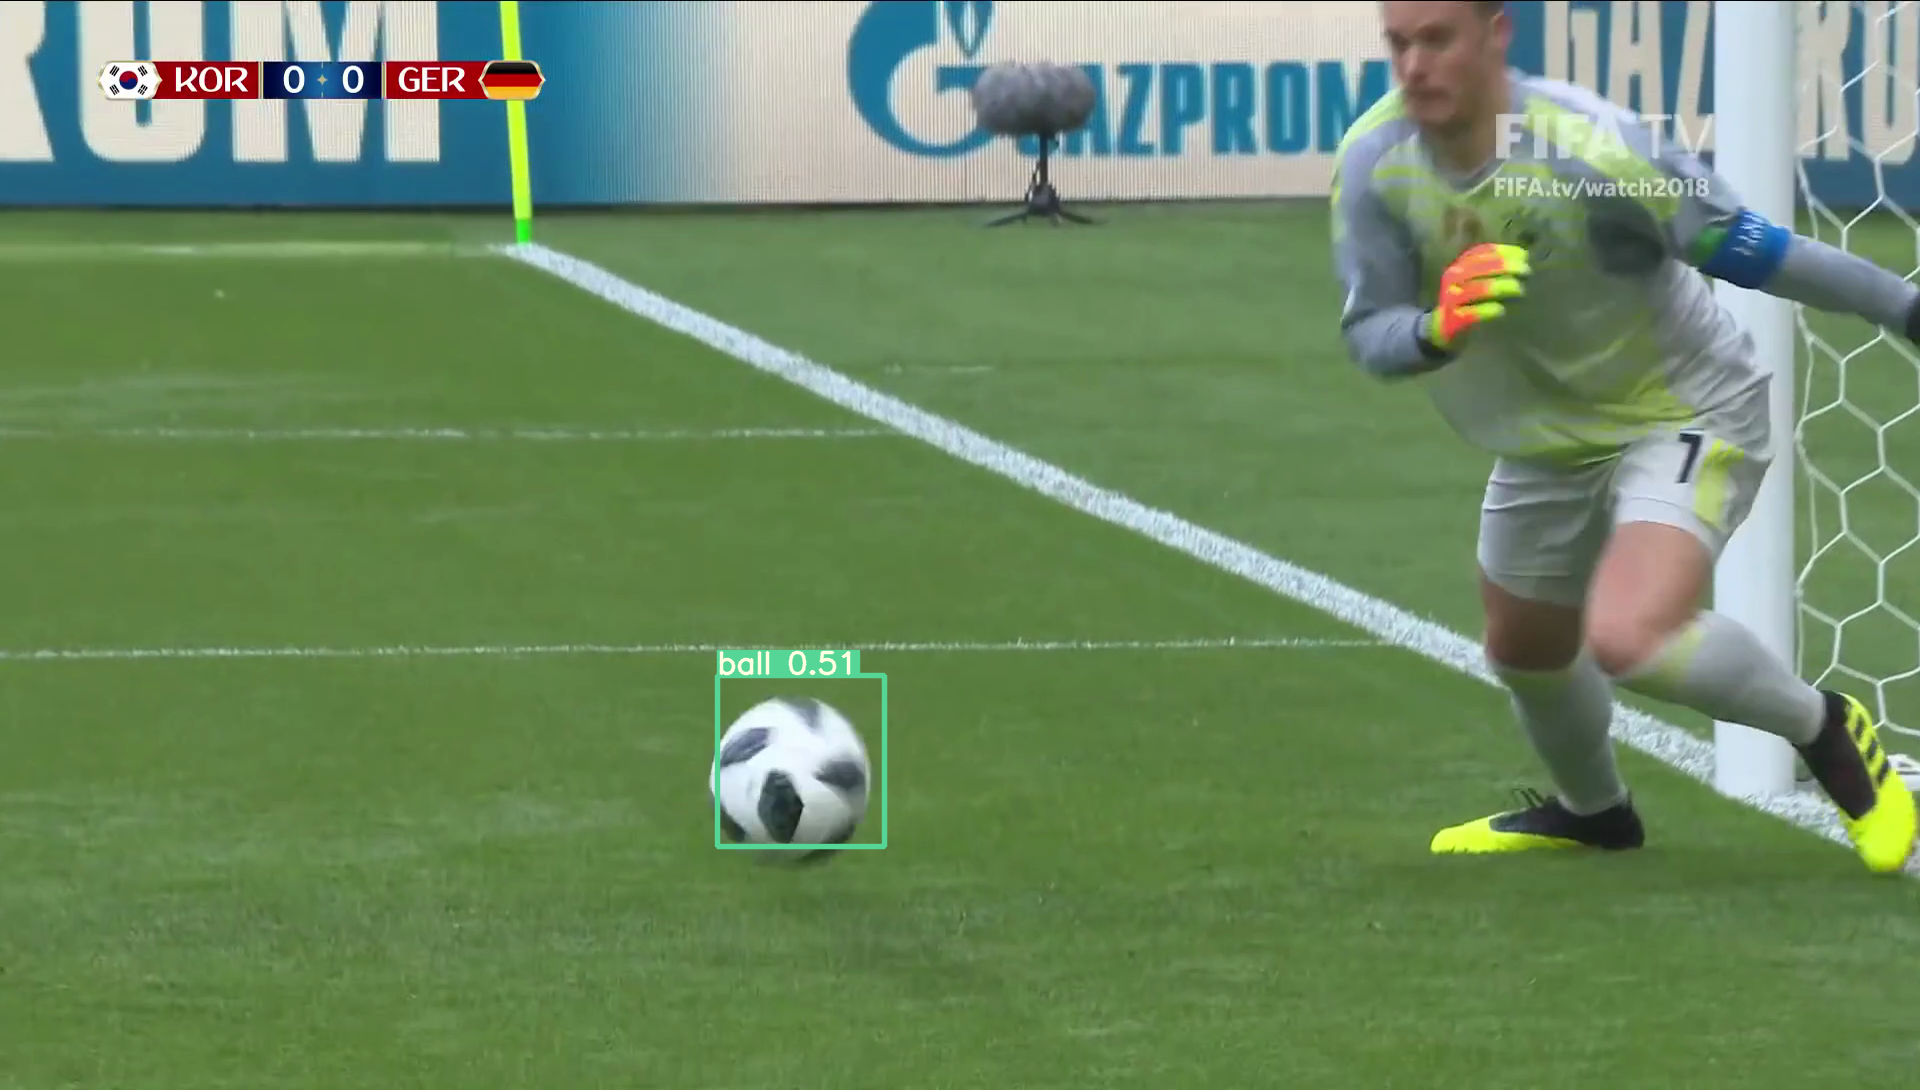

In [42]:
Image(filename='inference/output/scene10841.png', width=600)